# <center>Estudo Dirigido ‒ Separação gasosa por membranas de sílica</center>

<p style='text-align: justify;'>O objetivo deste estudo dirigido é apresentar uma análise exploratória de um conjunto de dados de permeação gasosa utilizando membranas de sílica obtidas no website da Sociedade da Membrana da Australásia. Este notebook contém um planejamento detalhado da solução, que é apresentada com um texto introdutório, gráficos e tabelas representando os dados e discussões dos resultados obtidos.</p>

## Planejamento da solução: Método SAPE (Saída - Processo - Entrada)

### Saída (Produto Final):
- Arquivo tipo .xlsx com a base de dados após processo de limpeza;
- Notebook intitulado "membranas_de_sílica" contendo:
    - Introdução em texto acerca do processo de permeação de gases por membranas, especialmente do tipo sílica;
    - Gráficos 3D correlacionando os dados, utilizando a biblioteca Matplotlib;
    - Gráfico de pares de todo o conjunto de dados, utilizando a biblioteca Seaborn;
    - Tabelas com informações das correlações das colunas do conjunto de dados;
    - Modelo de regressão linear múltipla correlacionando a permeabilidade de H<sub>2</sub> com as permeabilidades de CO<sub>2</sub> e N<sub>2</sub>.

### Processo (Passos de realização):
#### Etapa A - Importação e limpeza dos dados
- **A.1.** Importação dos dados para o notebook, a partir de um arquivo do tipo .xlsx;<br/>
- **A.2.** Criação de um dataframe utilizando a biblioteca Pandas;<br/>
- **A.3.** Análise e limpeza do dataframe, a partir da observação de nome e tipo das colunas, para então proceder à remoção de  colunas irrelevantes e renomeação das colunas relevantes;<br/>
- **A.4.** Verificação de dados faltantes (NaN - Not a Number; "-") através da biblioteca missingno utilizando visualização do   tipo Matrix;<br/>
- **A.6** Remoção de linhas contendo dados faltantes;<br/>
- **A.7** Visualização dos dados presentes no através da biblioteca missingno utilizando visualização do tipo Barras;<br/>
- **A.8** Criação de um arquivo .xlsx com o conjunto de dados após sua limpeza.<br/>
   
#### Etapa B - Criação de gráficos
- **B.1.** Criação de gráficos 3D com a biblioteca Matplotlib e discussão dos resultados obtidos;
- **B.2.** Criação de um gráfico de pares com a biblioteca Seaborn relacionando todas as colunas do dataframe, com discussão dos resultados;
- **B.3.** Aplicação da função describe() da biblioteca Pandas no dataframe.

#### Etapa C - Correlação e Regressão Linear
- **C.1.** Aplicação da função corr() da biblioteca Pandas no dataframe e discussão dos resultados obtidos;
- **C.2.** Análise de viabilidade e aplicação de métodos de regressão linear múltipla correlacionando a permeabilidade de H<sub>2</sub> com as permeabilidades de CO<sub>2</sub> e N<sub>2</sub>, fazendo uso da biblioteca scikit-learn.
     
### Entrada (Fontes das bases de dados):
- Arquivo tipo .xlsx nomeado "MSA Membrane Database.xlsx" disponível no website da Sociedade da Membrana da Australásia.

---

## Introdução
<p style='text-align: justify;'>Desafio primordial da indústria química é separar, concentrar e purificar as correntes resultantes dos processos de transformação. Além dos processos clássicos de separação como destilação, filtração, absorção, troca iônica, centrifugação, extração por solvente, cristalização e outros, a partir da década de 1970, surge uma nova classe de separação utilizando membranas sintéticas a nível industrial como tentativa de imitar membranas naturais quanto às suas propriedades de seletividade e permeabilidade. Embora haja processos clássicos de separação viáveis para uma grande faixa de dimensões de espécies a serem separadas, os processos que utilizam membranas oferecem maiores opções a separações de espécies de menor tamanho. Assim, é possível a utilização de processos combinados que utilizam de métodos clássicos e membranas tendo em vista as faixas nos quais cada processo é mais viável e vantajoso. Os processos de separação por membranas possuem aplicabilidade em variadas áreas da indústria química, farmacêutica, biotecnologia, medicina, tratamentos de efluentes, indústrias de alimentos, entre outras.</p><br/>
<center><img src="Faixas_de_aplicacao.png" style="height: 320px; width:457px;"/></center>
<center>Figura 1 – Quadro comparativo entre processos clássicos de separação e os PSM, em função das dimensões das espécies a serem separadas.<br/>
Fonte: (Habert, 2006).</center>
<p style="text-align: justify;">É necessário que haja uma força motriz agindo em uma espécie para que seu transporte possa ocorrer. Processos comerciais de separação por membranas utilizam gradiente de potencial químico e gradiente de potencial elétrico como força motriz. Em sua maioria, os processos de separação por membrana são atérmicos e por isso o gradiente químico pode ser expressão por gradientes de pressão e concentração nas fases. Neste fenômeno, o transporte pode ser realizado por meios convectivos ou de difusão, devido à morfologia das membranas e do tipo de força motriz empregada.</p><br/>
<center><img src="Permeacao.png"/></center>
<center>Figura 2 – Ilustração do processo de permeação gasosa através de membrana.<br/>
Fonte: (Adaptado de Habert, 2006).</center>
<p style="text-align: justify;">As membranas podem ser categorizadas segundo seus materiais. Divididas em naturais e sintéticas, esta última categoria pode ainda ser subdividida em orgânicas ou inorgânicas. Vantagens das membranas inorgânicas como estabilidade física, química e térmica e alta vida útil foram chave para o desenvolvimento de tecnologias e materiais que utilizam tal categoria. Membranas de sílica mostram bons resultados em processos de separação de hidrogênio e dióxido de carbono e na destilação e pervaporação para separação de misturas aquosas orgânicas (Ismail, 2016).</p>
<p style="text-align: justify;">Neste estudo dirigido será feita uma análise exploratória de uma base de dados contendo informações de separação gasosa por meio de membranas de sílica, analisando a permeabilidade de H<sub>2</sub>, CO<sub>2</sub> e N<sub>2</sub> em função de temperatura e pressão. A tabela foi obtida através do website da Sociedade da Membrana da Australásia.</p>

---
## Etapa A - Importação e limpeza dos dados
### Carregamento dos dados
<p style="text-align: justify;">O dataset original está apresentado abaixo, ainda sem passar por nenhum processo de limpeza dos dados.</p>

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings

In [2]:
# Suprimindo avisos
warnings.filterwarnings("ignore")

In [3]:
# Importando a base de dados e criando um objeto do tipo dataframe
df = pd.read_excel('MSA Membrane Database.xlsx', sheet_name='Gas Separation Silica Membranes')
df

,Category:,Brief Description:,Extended Description:,Unnamed: 3,Unnamed: 4,Unnamed: 5,Data:,Data: .1,Data: .2,In Reference Data Location:,Reference Name:,Reference URL:
0,Category,Name,Description,CVD,Temp,Pres,H2,CO2,N2,NaN,NaN,NaN
1,NaN,NaN,NaN,hours,(°C),(bar),(mol/(sqm.s.Pa)),(mol/(sqm.s.Pa)),(mol/(sqm.s.Pa)),NaN,NaN,NaN
2,CVD,CVD Si,(T=250°C),NaN,250.0,NaN,0.0,NaN,0.0,fresh (figure 1),Akamatsu 2009,NaN
3,CVD,CVD Si,(T=600°C),NaN,600.0,NaN,0.0,NaN,0.0,fresh (figure 1),Akamatsu 2009,NaN
4,CVD,CVD Si,(T=300°C),NaN,300.0,NaN,0.0,NaN,0.0,fresh (figure 3),Akamatsu 2009,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
839,sol-gel,sol-gel Si,(T=50°C),NaN,50.0,NaN,0.000001,0.000001,0.0,C' (figure 5),Yoshioka 2001,NaN
840,sol-gel,sol-gel Si,(T=100°C),NaN,100.0,NaN,0.000001,0.0,0.0,C' (figure 5),Yoshioka 2001,NaN
841,sol-gel,sol-gel Si,(T=200°C),NaN,200.0,NaN,0.000001,0.0,0.0,C' (figure 5),Yoshioka 2001,NaN
842,sol-gel,sol-gel Si,(T=300°C),NaN,300.0,NaN,0.000001,0.0,0.0,C' (figure 5),Yoshioka 2001,NaN


### As colunas do DataFrame
<p style="text-align: justify;">Conferindo as colunas do DataFrame.</p>

In [4]:
# Conferindo o nome das colunas do dataframe
print('--- Colunas do DataFrame ---\n')
for i in df.columns:
    print(i)

--- Colunas do DataFrame ---

Category:
Brief Description:
Extended Description:
Unnamed: 3
Unnamed: 4
Unnamed: 5
Data: 
Data: .1
Data: .2
In Reference Data Location:
Reference Name:
Reference URL:


### Removendo colunas do DataFrame
<p style="text-align: justify;">Removendo as colunas irrelevantes para a análise exploratória de dados. As colunas são <strong>"Brief Description:"</strong>, <strong>"Extended Description:"</strong>, <strong>"Unnamed: 3"</strong>, <strong>"In Reference Data Location:"</strong>, <strong>"Reference Name:"</strong> e <strong>"Reference URL:".</strong></p>


In [5]:
# Removendo as colunas 'Brief Description:', 'Extended Description:', ‘Unnamed: 3’, 
# 'In  Reference Data Location:', 'Reference Name:' e 'Reference URL:'
df.drop(columns=['Brief Description:', 'Extended Description:', 'Unnamed: 3','In Reference Data Location:',
                 'Reference Name:', 'Reference URL:'], inplace=True)
df

,Category:,Unnamed: 4,Unnamed: 5,Data:,Data: .1,Data: .2
0,Category,Temp,Pres,H2,CO2,N2
1,NaN,(°C),(bar),(mol/(sqm.s.Pa)),(mol/(sqm.s.Pa)),(mol/(sqm.s.Pa))
2,CVD,250.0,NaN,0.0,NaN,0.0
3,CVD,600.0,NaN,0.0,NaN,0.0
4,CVD,300.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...
839,sol-gel,50.0,NaN,0.000001,0.000001,0.0
840,sol-gel,100.0,NaN,0.000001,0.0,0.0
841,sol-gel,200.0,NaN,0.000001,0.0,0.0
842,sol-gel,300.0,NaN,0.000001,0.0,0.0


### Renomeando as colunas e excluindo as duas primeiras linhas
<p style="text-align: justify;">Renomeando as colunas do DataFrame e excluindo as duas primeiras linhas que não possuem informações sobre as variáveis da análise. As colunas de interesse são <strong>Category</strong>, <strong>Temp</strong>, <strong>Pres</strong>, <strong>H2</strong>, <strong>CO2</strong> e <strong>N2</strong>. Ao fim da transformação, o resultado é um DataFrame de 6 colunas e 842 linhas.</p>


In [6]:
# Renomeando as colunas e excluindo as duas primeiras linhas do dataframe
df.columns = df.iloc[0, :].to_list()
df = df.iloc[2:, :]

### Visualização e limpeza de dados faltantes
<p style="text-align: justify;">Na visualização do DataFrame acima é facilmente observável que há dados faltantes do tipo NaN. Utilizando a biblioteca <strong>missingno</strong> é possível plotar gráficos que indicam dados faltantes. A visualização do tipo matriz abaixo mostra esse fenômeno no conjunto de dados da análise. Cada uma das faixas escuras indica dados presentes em cada uma das colunas, enquanto onde há linhas brancas há uma correspondência de dados faltantes (representados como NaN). Faltam dados nas colunas <strong>Pres</strong>, <strong>CO2</strong> e <strong>N2</strong>.</p>


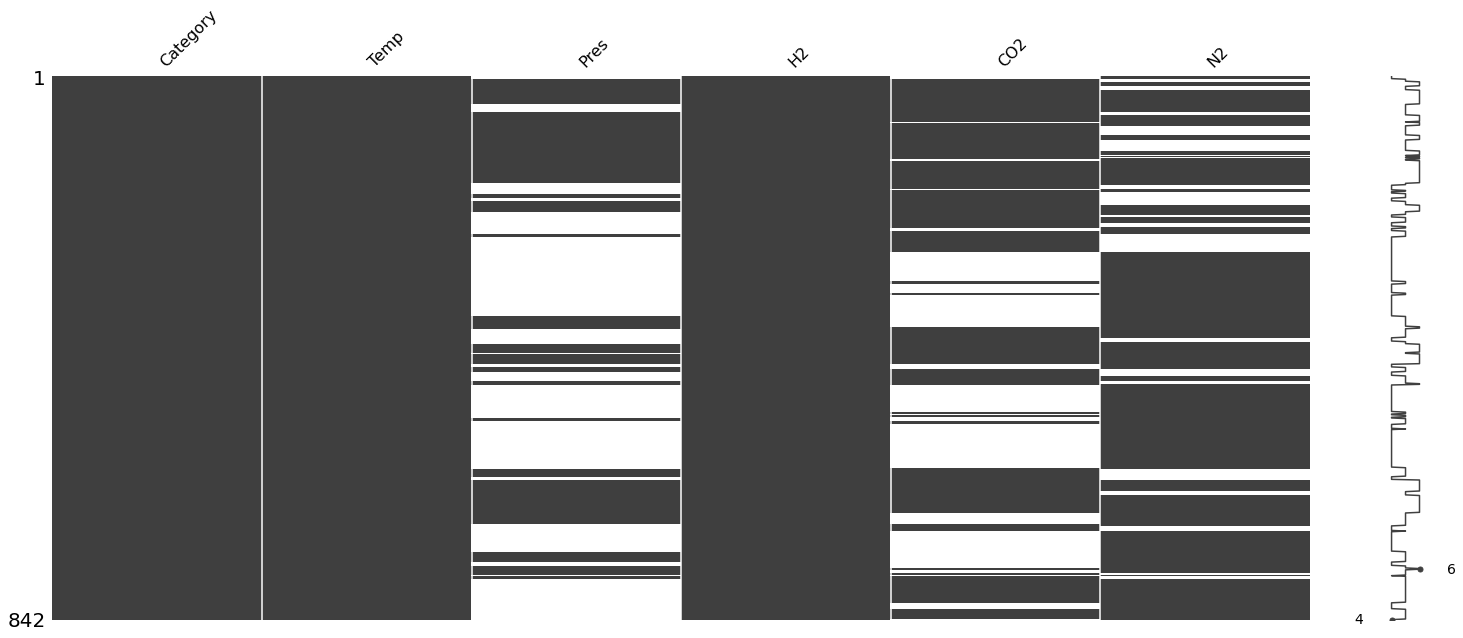

In [7]:
# Plotando o gráfico do tipo matriz da biblioteca missingno
msno.matrix(df)
plt.show()

<p style="text-align: justify;">Deve-se atentar, ainda, a linhas que não possuem valores NaN mas que apresentam valores espaços em branco ou traços. Para isso, serão excluídas linhas que possuem tais dados.</p>


In [8]:
# Substituindo '-' por NaN
df = df.replace('-', np.NaN)

# Removendo as linhas com valores inválidos
df = df.dropna(axis=0, how='any')

# Reiniciando o índice do DataFrame
df = df.reset_index(drop=True)

# Visualizando o DataFrame
df

,Category,Temp,Pres,H2,CO2,N2
0,sol-gel,300.0,1.750,1.600000e-06,2.740000e-07,4.400000e-08
1,sol-gel,250.0,1.750,1.390000e-06,3.030000e-07,3.780000e-08
2,sol-gel,200.0,1.750,1.320000e-06,4.050000e-07,3.780000e-08
3,sol-gel,150.0,1.750,1.210000e-06,5.260000e-07,3.440000e-08
4,sol-gel,100.0,1.750,1.130000e-06,7.040000e-07,3.300000e-08
...,...,...,...,...,...,...
176,CVD,50.0,0.002,5.484420e-08,8.897650e-09,1.268410e-08
177,CVD,200.0,0.002,5.484420e-08,8.897650e-09,1.268410e-08
178,CVD,400.0,0.002,5.484420e-08,8.897650e-09,1.268410e-08
179,sol-gel,200.0,1.000,7.490450e-07,7.776680e-08,1.003560e-07


<p style="text-align: justify;">Após esta etapa de limpeza, o DataFrame resultante possui 181 linhas.</p>

<p style="text-align: justify;">Utilizando outro gráfico da biblioteca missingno, nos certificamos de que não há mais dados faltantes. Cada barra do gráfico apresenta o número de colunas com dados válidos. Todas as 6 colunas apresentam 181 valores.</p>



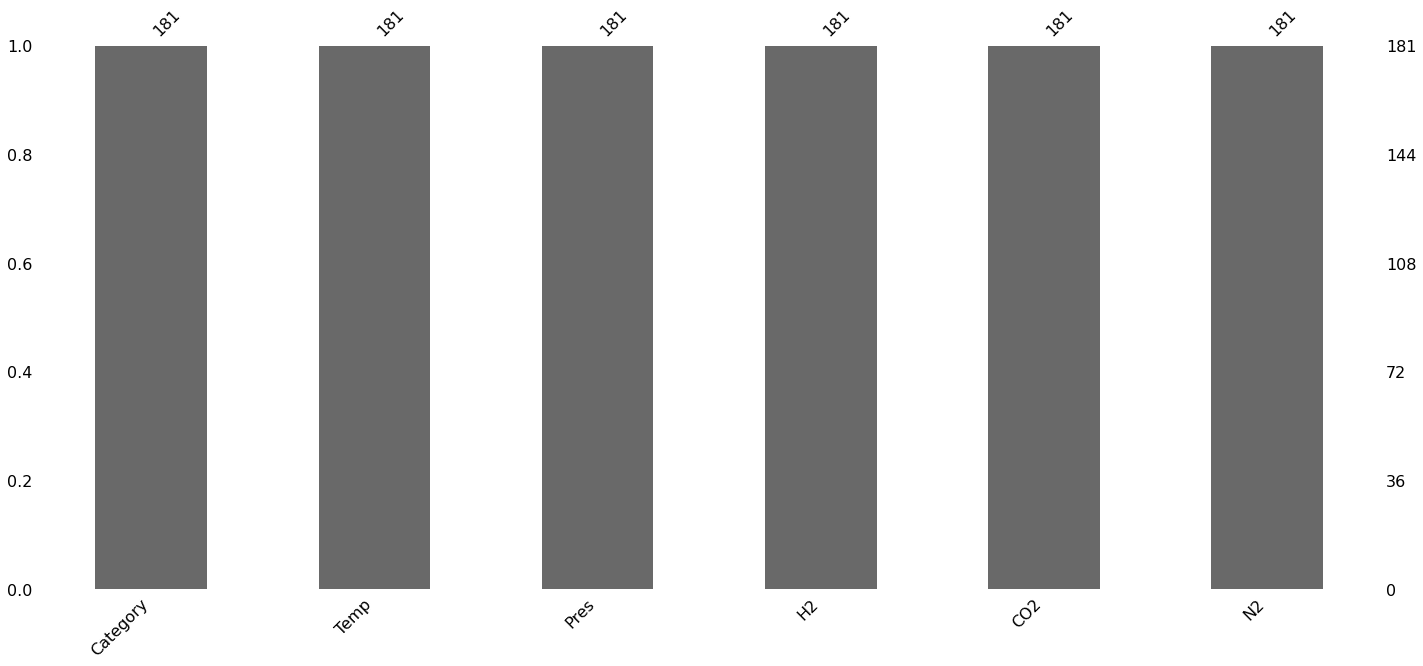

In [9]:
# Plotando o gráfico do tipo barras da biblioteca missingno
msno.bar(df)
plt.show()

### Arquivo excel com o conjunto de dados após limpeza

In [10]:
# Função to_excel() da biblioteca pandas
df.to_excel("MSA Membrane Database Final.xlsx", sheet_name = 'Gas Separation Silica Membranes',
            index=False)

---
## Etapa B - Criação de Gráficos
### Gráficos de dispersão 3D
<p style="text-align: justify;">Para melhor visualização dos gráficos, abaixo são apresentados 3 gráficos de dispersão das permeabilidades dos gases hidrogênio, carbônico e nitrogênio em função das temperaturas e pressões de trabalho das membranas de sílica.</p>

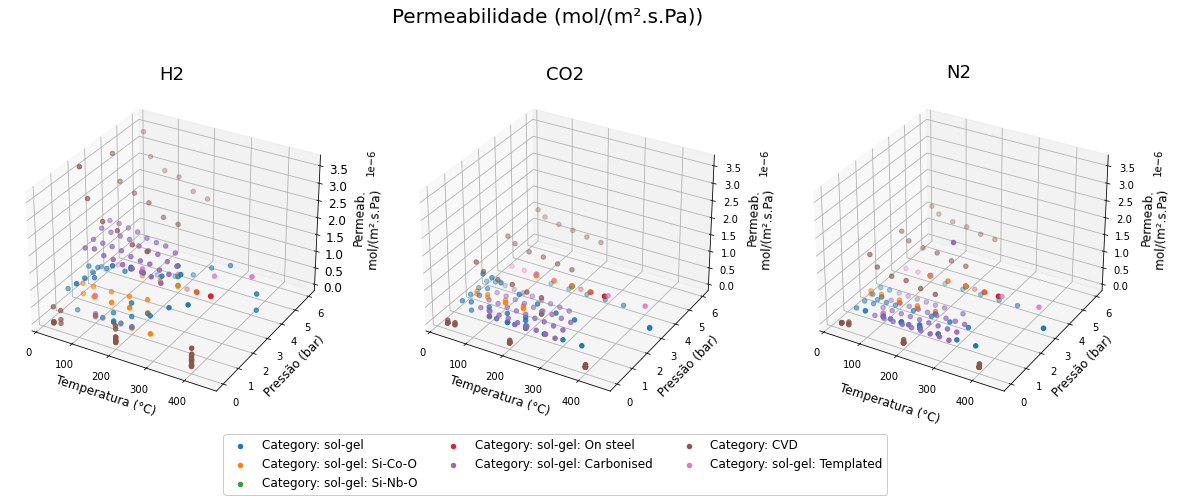

In [11]:
# Construção dos gráficos de dispersão

# Configuração da figura
fig = plt.figure(figsize=(20, 7))
fig.suptitle('Permeabilidade (mol/(m².s.Pa))', fontsize=20)

# Gráfico H2
axs0 = fig.add_subplot(1, 3, 1, projection='3d')
for i in df['Category'].unique():
    axs0.scatter(data=df[df['Category'] == i], xs='Temp', ys='Pres', zs='H2',
                 label = f'Category: {i}')

# Gráfico CO2
axs1 = fig.add_subplot(1, 3, 2, projection='3d', sharez=axs0)
for i in df['Category'].unique():
    axs1.scatter(data=df[df['Category'] == i], xs='Temp', ys='Pres', zs='CO2',
                 label = f'Category: {i}')

# Gráfico N2
axs2 = fig.add_subplot(1, 3, 3, projection='3d', sharez=axs0)
for i in df['Category'].unique():
    axs2.scatter(data=df[df['Category'] == i], xs='Temp', ys='Pres', zs='N2',
                 label = f'Category: {i}')

# Parametrizando o gráfico H2
axs0.set_title('H2', fontsize=18, pad=0)
axs0.set_zlim(top=df['H2'].max())
axs0.tick_params(axis='z', labelsize=12)
axs0.set_xlabel('Temperatura (°C)', fontsize=12)
axs0.set_ylabel('Pressão (bar)', fontsize=12)
axs0.set_zlabel('Permeab.\nmol/(m².s.Pa)      ', fontsize=12, labelpad=10)

# Parametrizando o gráfico CO2
axs1.legend(ncol=3, framealpha=1, bbox_to_anchor=(1.5, -0.05), fontsize=12)
axs1.set_title('CO2', fontsize=18, pad=0)
axs1.set_xlabel('Temperatura (°C)', fontsize=12)
axs1.set_ylabel('Pressão (bar)', fontsize=12)
axs1.set_zlabel('Permeab.\nmol/(m².s.Pa)      ', fontsize=12, labelpad=10)

# Parametrizando o gráfico N2
axs2.set_title('N2', fontsize=18)
axs2.set_xlabel('Temperatura (°C)', fontsize=12, labelpad=10)
axs2.set_ylabel('Pressão (bar)', fontsize=12)
axs2.set_zlabel('Permeab.\nmol/(m².s.Pa)      ', fontsize=12, labelpad=10)

# Visualizando os três gráficos
plt.show()

<p style="text-align: justify;">Nos gráficos 3D acima são plotados os valores de permeabilidade dos gases estudados (eixo vertical z) em mol/(m².s.Pa) em relação às temperaturas e pressões de trabalho (eixos horizontais x e y) em °C e bar, respectivamente, com separação em cores relativas às categorias de membranas. Em todos os gráficos observa-se maiores valores de permeabilidade para a membrana do tipo CVD, representada na cor marrom, seguida da membrana do tipo sol-gel: Carbonised em cor roxa.</p>
<p style="text-align: justify;">Em específico à membrana do tipo CVD, é possível constatar que menores temperaturas — até 200 °C — e pressões mais elevadas — 3 a 6 bar — apresentam maiores valores de permeabilidade gasosa. Comparando-se ainda os três gráficos, há tendência de maiores valores de permeabilidade de H<sub>2</sub> em comparação aos outros gases, informação útil que indica que o uso da membrana CVD para separação de gás hidrogênio é viável.</p>

### Gráficos pairplot
<p style="text-align: justify;">A função pairplot() da biblioteca Seaborn permite a plotagem de gráficos que correlacionam as variáveis entre pares. No dataset de estudo, por haver 5 colunas com valores numéricos, a função plota gráficos em 5 linhas e 5 colunas. Ainda é possível usar a coluna Category, de valores categóricos, como divisor dos dados por cores, através do parâmetro hue da função.</p>


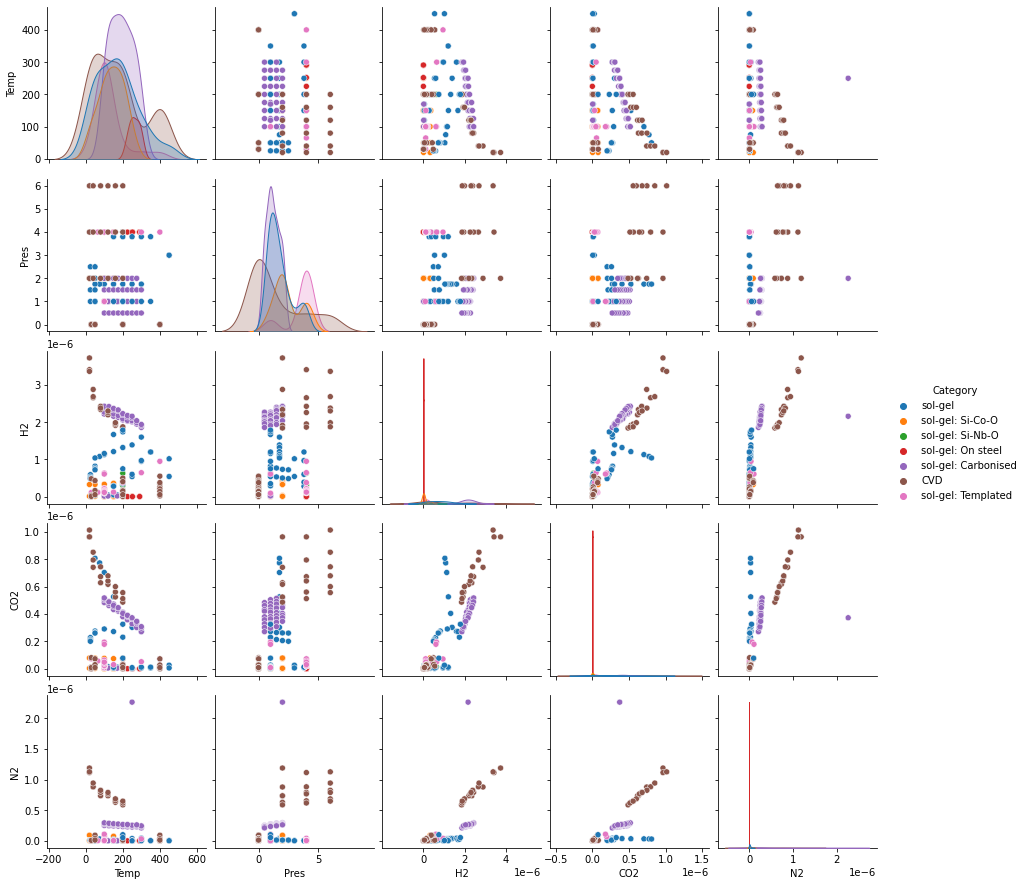

In [12]:
# Plotando os gráficos pairplot
sns.pairplot(df, hue='Category')

<p style="text-align: justify;">Nos últimos dois gráficos da terceira linha pode-se observar uma relação próxima à linear entre as permeabilidades de gás hidrogênio e CO<sub>2</sub> e N<sub>2</sub>. Uma análise numérica mais rigorosa dessas relações será apresentada posteriormente. Esta observação é importante pois evidencia a possibilidade da utilização de modelos de regressão linear para predizer valores da permeabilidade de H<sub>2</sub>, tópico que também será apresentado ao longo deste estudo.</p>


### Função describe()
<p style="text-align: justify;">Com a função describe(), pode-se analisar parâmetros estatísticos descritivos importantes de um dataset que resumem tendências centrais e de dispersão e ainda o tamanho do conjunto de dados.</p>

In [13]:
# Função describe() para analisar as estatísticas descritivas
df.describe(include='all')

,Category,Temp,Pres,H2,CO2,N2
count,181,181.000000,181.000000,1.810000e+02,1.810000e+02,1.810000e+02
unique,7,NaN,NaN,NaN,NaN,NaN
top,CVD,NaN,NaN,NaN,NaN,NaN
freq,48,NaN,NaN,NaN,NaN,NaN
mean,NaN,170.276243,1.979746,9.007042e-07,1.987998e-07,1.519069e-07
std,NaN,102.283652,1.592914,9.689683e-07,2.510466e-07,2.951244e-07
min,NaN,20.000000,0.000200,5.200000e-10,5.370000e-12,5.370000e-12
25%,NaN,100.000000,1.000000,4.758660e-08,5.974840e-09,2.307190e-09
50%,NaN,160.000000,1.750000,4.270000e-07,4.710970e-08,1.194800e-08
75%,NaN,200.000000,4.000000,1.950000e-06,3.800000e-07,2.410000e-07


<p style="text-align: justify;">Ao aplicar a função no conjunto de estudo, observa-se que das 181 linhas, a categoria CVD possui 48 ocorrências, sendo a mais frequente em comparação com as outra 6 categorias únicas. Vê-se ainda as variáveis média, desvio padrão, valores mínimos e máximos e os quartis (25%, 50% — também chamada de mediana —  e 75%) das variáveis Temperatura, Pressão e permeabilidades de H<sub>2</sub>, CO<sub>2</sub> e N<sub>2</sub>.</p> 
<p style="text-align: justify;">As temperaturas e pressões de trabalho variam entre 20 e 450 °C e de 0,0002 e 6 bar, com valores médios de aproximadamente 170 °C e 2 bar. Já a permeabilidade de H<sub>2</sub> possui um valor médio de cerca de 9.01.10<sup>-7</sup> mol/(m².s.Pa) e as permeabilidades de CO<sub>2</sub> e N<sub>2</sub> possuem valores médios se aproximando de 1.99.10<sup>-7</sup> e 1.52.10<sup>-7</sup> mol/(m².s.Pa).</p>

---
## Etapa C - Correlação e regressão linear
### Função corr()
<p style="text-align: justify;">A função corr(), por definição encontrada na documentação da biblioteca, computa as correlações das colunas do dataset em pares, ou seja, calcula e providencia o efeito de cada coluna nos valores das demais. Esses valores variam de -1 a 1, sendo que os limites superior e inferior indicam que uma variável tem um efeito diretamente e inversamente proporcionais, respectivamente, aos valores de outra variável.</p>

In [14]:
# Função corr() para analisar as correlações entre as colunas
display(df.corr())

,Temp,Pres,H2,CO2,N2
Temp,1.000000,-0.135848,-0.045719,-0.266395,-0.148143
Pres,-0.135848,1.000000,0.094648,0.184835,0.266928
H2,-0.045719,0.094648,1.000000,0.901185,0.731594
CO2,-0.266395,0.184835,0.901185,1.000000,0.745688
N2,-0.148143,0.266928,0.731594,0.745688,1.000000


<p style="text-align: justify;">Especificamente no dataset deste estudo, observamos que as variáveis Temperatura e Pressão possuem baixo efeito na variável de permeabilidade de H<sub>2</sub>, pois a função calcula os valores de <strong>-0,045719</strong> para Temperatura e <strong>0,094648</strong> para Pressão, valores próximos de 0. Por outro lado, a função indica que a correlação entre as permeabilidades de H<sub>2</sub> e CO<sub>2</sub> é de <strong>0,901185</strong> e entre a permeabilidade de H<sub>2</sub> e N<sub>2</sub> são de <strong>0,731594</strong>. Os valores são mais próximos de 1, portanto as variáveis possuem maior efeito proporcional entre si.</p>
<p style="text-align: justify;">Com base nos resultados de correlação entre os valores das permeabilidades de H<sub>2</sub> e de CO<sub>2</sub> e N<sub>2</sub>, é viável a aplicação de um modelo de regressão linear múltipla para correlacionar e prever resultados. Isso se dá porque para fazer uso de um modelo de regressão linear, é aconselhável que a correlação entre as variáveis independentes e dependente seja suficientemente alta, e dados os valores descritos pela função corr(), julga-se prudente o emprego do método.</p>

### Regressão Linear Múltipla

O processo de regressão linear é usado quando se deseja predizer valores de uma variável dependente contínua a partir de um número de variáveis independentes. O termo ___múltipla___ se refere ao emprego de duas ou mais variáveis independentes para a determinação da equação da regressão. A equação segue o formato

$$Y = b_1X_1 + b_2X_2 + ... + A$$

onde<br/>
$Y$ é a variável dependente calculada,<br/>
$X_i$ são as variáveis independentes,<br/>
$b_i$ são os coeficientes que descrevem a magnitude de efeito de cada variável independente sobre a dependente,<br/>
$A$ é o valor predito da variável dependente quando todas as variáveis independentes são iguais a zero.

No caso deste estudo dirigido, buscamos uma equação do formato 

$$ P^{prev}_{H_2} = b_1P_{CO_2} + b_2P_{N_2} + ... + A$$

onde<br/>
$P^{prev}_{H_2}$ é a permeabilidade de H<sub>2</sub> prevista pelo modelo,<br/>
$P_{CO_2}$ é a permeabilidade de CO<sub>2</sub>,<br/>
$P_{N_2}$ é a permeabilidade de N<sub>2</sub>.

### Construção do modelo

#### Separando as variáveis X e y entre variáveis independentes e variável dependente

In [15]:
X = df[['CO2', 'N2']]
y = df['H2']

#### Dividindo as variáveis de treino do modelo e de teste na razão 70%:30%

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=5381)

#### Instanciando o modelo através da função LinearRegression da biblioteca scikit-learn

In [17]:
modelo = LinearRegression()

#### Aplicando o modelo de regressão linear múltipla nas variáveis de teste

In [18]:
modelo.fit(X_train, y_train)

LinearRegression()

#### Extraindo os coeficientes do modelo

In [19]:
print('Coeficientes b₁ e b₂:')
print(f'b₁ = {modelo.coef_[0]:.6f}')
print(f'b₂ = {modelo.coef_[1]:.6f}\n')
print('Coeficiente A:')
print(f'A = {modelo.intercept_:.6e}\n')

Coeficientes b₁ e b₂:
b₁ = 2.917240
b₂ = 0.571883

Coeficiente A:
A = 2.476253e-07



<p style="text-align: justify;">No modelo de regressão linear múltipla, a equação resultante é $ P^{prev}_{H_2} = 2,917240P_{CO_2} + 0,571883P_{N_2} + ... + 2,476253.10^{-7}$ — significando que a permeabilidade de H<sub>2</sub> é prevista para aumentar 2,917240 mol/(m².s.Pa) e 0.571883 mol/(m².s.Pa) quando as permeabilidades de CO<sub>2</sub> e N<sub>2</sub> aumentarem em 1 mol/(m².s.Pa), respectivamente, e que a permeabilidade de H<sub>2</sub> é 2.476253e-07 mol/(m².s.Pa) quando as permeabilidades de CO<sub>2</sub> e N<sub>2</sub> forem ambas iguais a zero.</p>

#### Coeficiente de determinação - R²
<p style="text-align: justify;">Um artifício para avaliar a performance de um modelo de regressão linear é o <strong>coeficiente de determinação</strong>, representado como R². Este parâmetro representa a proporção da variabilidade na variável dependente explicada pelas variáveis independentes, dando a ideia de quão bem pode-se prever a variável dependente a partir das variáveis independentes.</p>

In [20]:
print(f'R² = {modelo.score(X_test, y_test):.4f}')

R² = 0.9111


<p style="text-align: justify;">O resultado de R² = 0,9111 significa que o modelo de regressão linear múltipla explica cerca de <strong>91,11%</strong> da variância da permeabilidade de H<sub>2</sub> a partir das permeabilidades de CO<sub>2</sub> e N<sub>2</sub>.</p>

## Referências bibliográficas
HABERT, A. C.; BORGES, C. P.; NOBREGA, R. Processos de separação por membranas. Editora E-papers, 2006.

ISMAIL, A.F., RAHMAN, M. Silica Membrane. Encyclopedia of Membranes. Springer, Berlin, Heidelberg, 2016.

Interpreting Regression Output. Princeton University Library. Disponível em: <[https://dss.princeton.edu/online_help/analysis/interpreting_regression.htm#:~:text=a%20miniscule%20effect.-,Coefficients,the%20direction%20of%20the%20effect](https://dss.princeton.edu/online_help/analysis/interpreting_regression.htm#:~:text=a%20miniscule%20effect.-,Coefficients,the%20direction%20of%20the%20effect)>. Acesso em 25 jul. 2022.

Documentação da biblioteca Pandas. Disponível em <[https://pandas.pydata.org/](https://pandas.pydata.org/)>. Acesso em 26 jun. 2022.

McDONALD, A. Using the missingno Python library to Identify and Visualise Missing Data Prior to Machine Learning. Disponível em <[https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009](https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009)>. Acesso em 26 jun. 2022.

Documentação da função dropna() da biblioteca Pandas. Disponível em <[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)>. Acesso em 26 jun. 2022.

Documentação da biblioteca Matplotlib. Disponível em <[https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009](https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009)>. Acesso em 29 jun. 2022.

Documentação da biblioteca Seaborn. Disponível em <[https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot)>. Acesso em 29 jun. 2022.

Documentação da função describe() da biblioteca Pandas. Disponível em <[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)>. Acesso em 30 jun. 2022.

Documentação da função corr() da biblioteca Pandas. Disponível em <[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)>. Acesso em 16 jun. 2022.

Documentação da função sklearn.linear_model.LinearRegression. Disponível em <[https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)>. Acesso em 17 jul. 2022.